# Étude statistique sur les saumons 
## Analyse des données de pêche

Groupe : Amandine Baranger, Guillaume Blain, Armand Mareine, Maxime Rousseau
### Objectif
Premier rendu du projet de statistique. Etude statistique univariée de 4 variables de types différents 

**Plan :**
1. Chargement des bibliothèques et des données
2. Variable 1 : Month Number
3. Variable 2 : Netting effort
4. Variable 3 : Wild MSW Weight (kg)
5. Variable 4 : Farms MSW Weight (kg)
6. Variable 5 : District 
7. Variable 6 : DistrictID
8. Variable 7 : Report Order
9. Variable 8 : Region
10. Variable 9 : Method
11. Variable 10 : Year
12. Variable 11 : Month
13. Variable 12 : Wild MSW number
14. Variable 13 : Wild 1SW Number
15. Variable 14 : Wild 1SW Weight(kg) 

## Chargement des données

In [5]:
# Chargement des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Chargement des données
saumons = pd.read_csv("saumons.csv", sep=',')

# Vérifier les premières lignes du DataFrame
print(saumons.head())

  District  District ID  Report order Region                   Method    Year  \
0    Tweed        101.0           1.0   East   Fixed Engine: Retained  1952.0   
1    Tweed        101.0           1.0   East  Net and Coble: Retained  1952.0   
2    Tweed        101.0           1.0   East   Fixed Engine: Retained  1952.0   
3    Tweed        101.0           1.0   East  Net and Coble: Retained  1952.0   
4    Tweed        101.0           1.0   East   Fixed Engine: Retained  1952.0   

      Month  Month number  Wild MSW number  Wild MSW weight (kg)  ...  \
0  February           2.0            107.0                 400.5  ...   
1  February           2.0           6606.0               24856.9  ...   
2     March           3.0            185.0                 703.1  ...   
3     March           3.0           7008.0               26151.9  ...   
4     April           4.0            484.0                1912.3  ...   

   Wild 1SW weight (kg)  Sea trout number  Sea trout weight (kg)  \
0     

In [20]:
print(saumons.columns)

Index(['District', 'District ID', 'Report order', 'Region', 'Method', 'Year',
       'Month', 'Month number', 'Wild MSW number', 'Wild MSW weight (kg)',
       'Wild 1SW number', 'Wild 1SW weight (kg)', 'Sea trout number',
       'Sea trout weight (kg)', 'Finnock number', 'Finnock weight (kg)',
       'Farmed MSW number', 'Farmed MSW weight (kg)', 'Farmed 1SW number',
       'Farmed 1SW weight (kg)', 'Netting effort'],
      dtype='object')


## Variable 1 : Month Number

In [22]:
# Statistiques descriptives
month_counts = saumons["Month number"].value_counts().sort_index()
month_frequencies = month_counts / month_counts.sum()
mean_captures = month_counts.mean()
median_captures = month_counts.median()
std_captures = month_counts.std()

# Trouver les mois avec le maximum et minimum de captures
max_month = month_counts.idxmax()
min_month = month_counts.idxmin()

print(f"Moyenne des captures par mois : {mean_captures:.2f}")
print(f"Médiane des captures par mois : {median_captures:.2f}")
print(f"Écart-type des captures : {std_captures:.2f}")
print(f"Le mois avec le plus de captures est : {max_month} ({month_counts[max_month]} captures)")
print(f"Le mois avec le moins de captures est : {min_month} ({month_counts[min_month]} captures)")

Moyenne des captures par mois : 2314.00
Médiane des captures par mois : 1845.50
Écart-type des captures : 1900.61
Le mois avec le plus de captures est : 7.0 (4978 captures)
Le mois avec le moins de captures est : 10.0 (1 captures)


In [23]:
# Fréquence des captures par mois 
df_frequencies = pd.DataFrame({
        "Month Number": month_counts.index,
        "Count": month_counts.values,
        "Frequency": month_frequencies.values
    })
print("Fréquence des captures par mois :")
print(df_frequencies)

Fréquence des captures par mois :
   Month Number  Count  Frequency
0           2.0   1039   0.044901
1           3.0   1461   0.063137
2           4.0   2230   0.096370
3           5.0   3428   0.148142
4           6.0   4462   0.192826
5           7.0   4978   0.215125
6           8.0   4514   0.195073
7           9.0   1026   0.044339
8          10.0      1   0.000043
9          11.0      1   0.000043


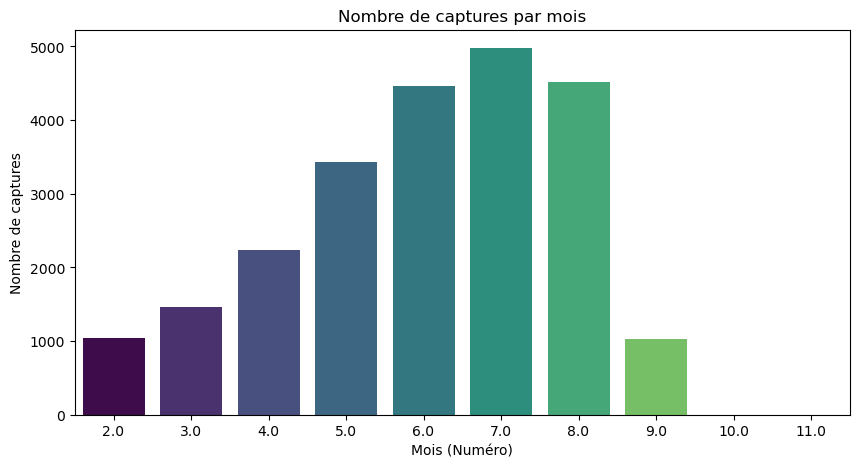

In [24]:
# Graphique en barres
plt.figure(figsize=(10, 5))
sns.barplot(x=month_counts.index, y=month_counts.values, hue=month_counts.index, palette="viridis", legend=False)
plt.xlabel("Mois (Numéro)")
plt.ylabel("Nombre de captures")
plt.title("Nombre de captures par mois")
plt.show()

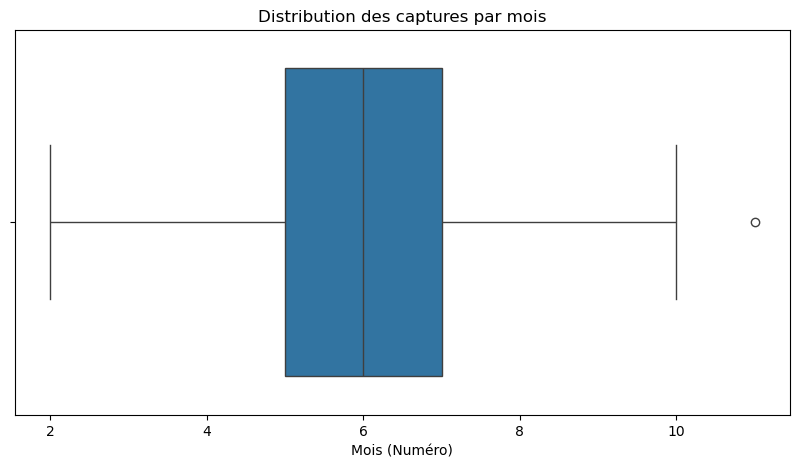

In [25]:
# Boxplot pour voir la dispersion des captures
plt.figure(figsize=(10, 5))
sns.boxplot(x=saumons["Month number"])
plt.xlabel("Mois (Numéro)")
plt.title("Distribution des captures par mois")
plt.show()

<Figure size 1200x600 with 0 Axes>

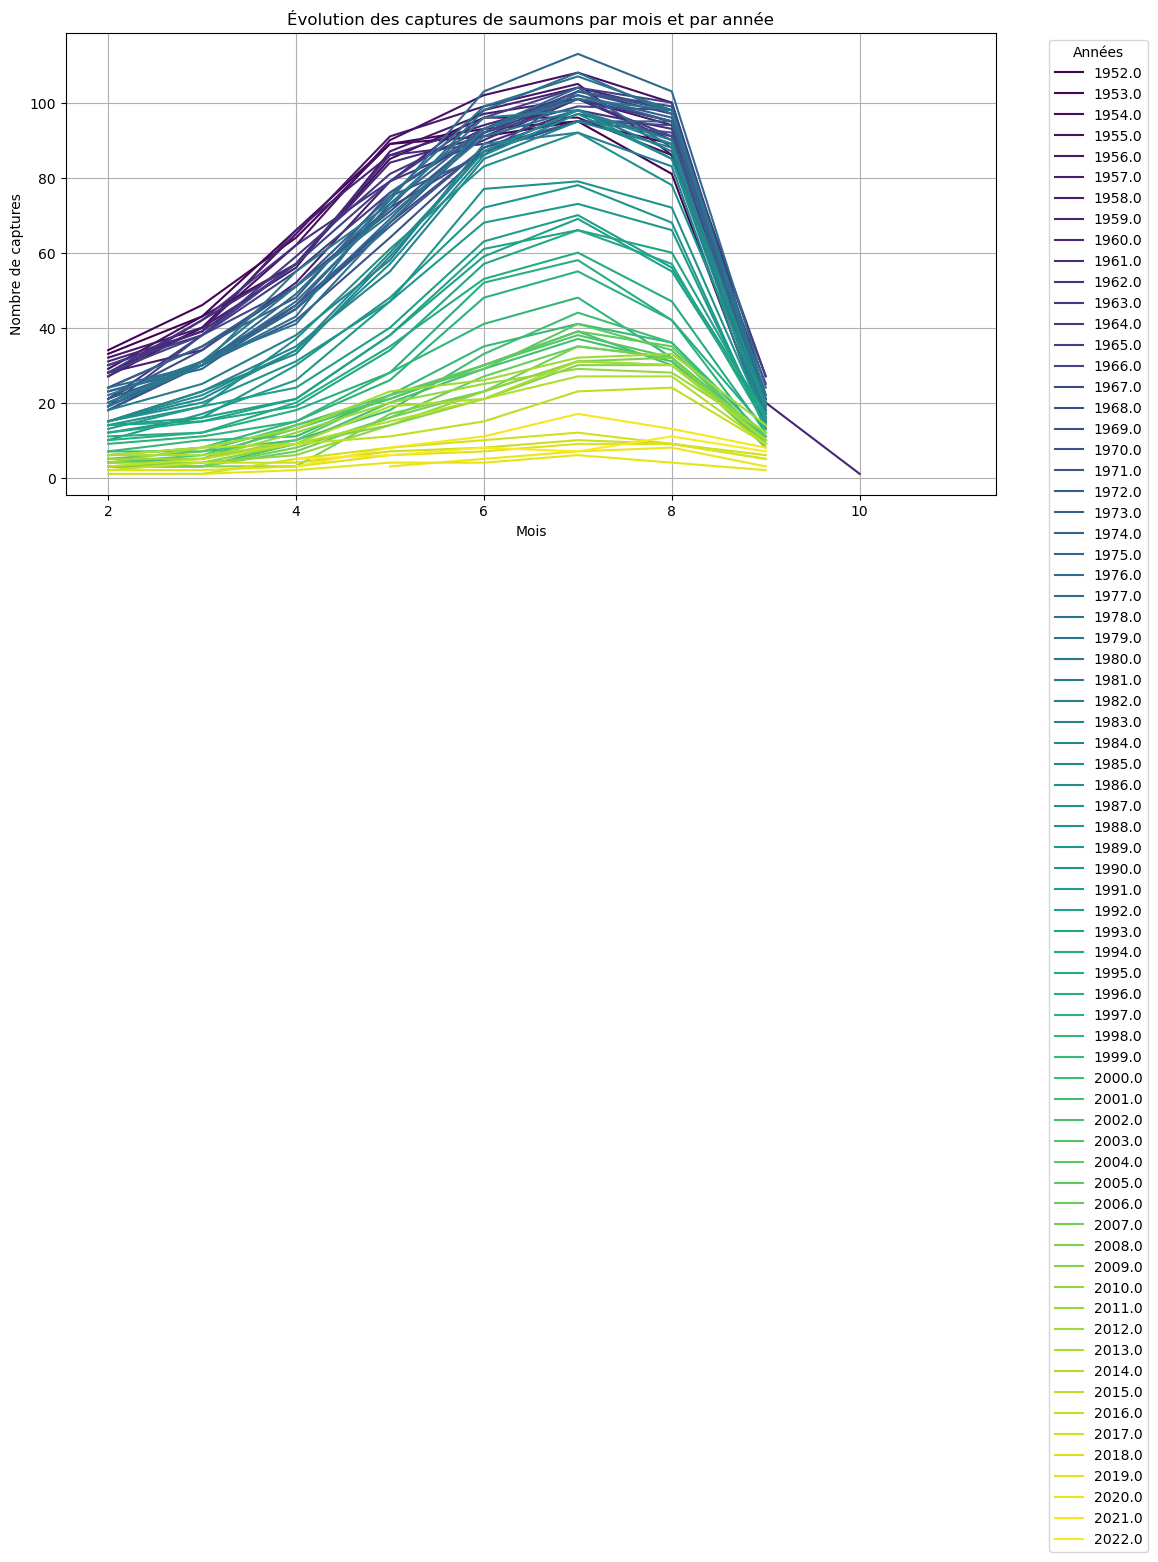

In [26]:
 # Analyse temporelle, évolution des captures par année
yearly_captures = saumons.groupby(["Year", "Month number"]).size().unstack()

plt.figure(figsize=(12, 6))
yearly_captures.T.plot(kind="line", figsize=(12, 6), colormap="viridis")
plt.xlabel("Mois")
plt.ylabel("Nombre de captures")
plt.title("Évolution des captures de saumons par mois et par année")
plt.legend(title="Années", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

## Variable 2 : Netting effort

In [28]:
netting_eff = saumons.iloc[:, 20]
print("La deuxième variable étudiée contient les données suivantes :\n", netting_eff, "\n")

La deuxième variable étudiée contient les données suivantes :
 0         4.0
1        31.0
2        10.0
3        31.0
4        21.0
         ... 
23138     0.0
23139     0.0
23140     NaN
23141     NaN
23142     NaN
Name: Netting effort, Length: 23143, dtype: float64 



In [29]:
moyenne_eff = netting_eff.mean()
mediane_eff = netting_eff.median()
mode_eff = netting_eff.idxmax()
ecart_type_eff = netting_eff.std()
min_eff = netting_eff.min()
max_eff = netting_eff.max()
q1_eff = netting_eff.quantile(0.25)
q3_eff = netting_eff.quantile(0.75)
print("Moyenne :", moyenne_eff)
print("Mediane :", mediane_eff)
print("Mode :", mode_eff)
print("Ecart-type :", ecart_type_eff)
print("Minimum :", min_eff)
print("Maximum :", max_eff)
print("Quartile 1 :", q1_eff)
print("Quartile 3 :", q3_eff)

Moyenne : 24.137878133102852
Mediane : 3.0
Mode : 22344
Ecart-type : 146.27741843213622
Minimum : 0.0
Maximum : 2215.0
Quartile 1 : 1.0
Quartile 3 : 8.0


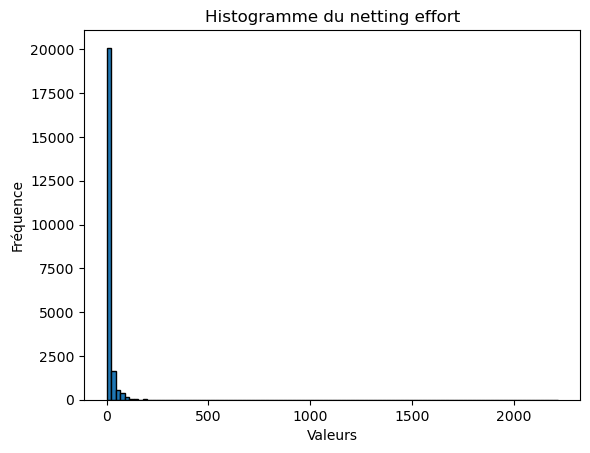

In [30]:
# Créer l'histogramme à partir de la colonne 'valeurs'
plt.hist(netting_eff, bins=100, edgecolor='black')

# Ajouter un titre et des labels
plt.title('Histogramme du netting effort')
plt.xlabel('Valeurs')
plt.ylabel('Fréquence')

# Afficher l'histogramme
plt.show()

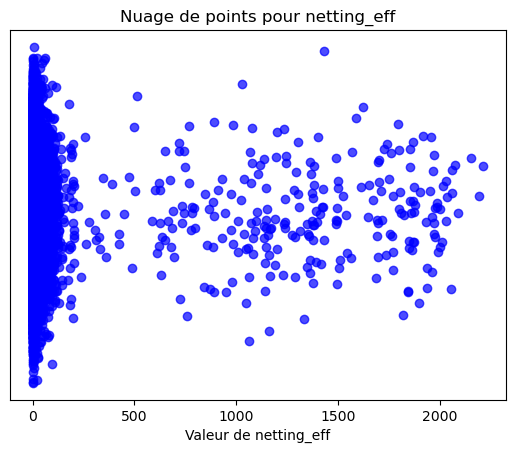

In [31]:
# Générer un léger "jitter" pour éviter le chevauchement des points
y = np.random.normal(0, 0.02, size=len(netting_eff))  

# Scatter plot en 1D
plt.scatter(netting_eff, y, color="blue", alpha=0.7)

# Personnalisation du graphique
plt.xlabel("Valeur de netting_eff")
plt.yticks([])  # Enlever l'axe Y (inutile)
plt.title("Nuage de points pour netting_eff")

plt.show()

## Variable 3 : Wild MSW Weight (kg)

In [33]:
var_3eme = saumons.iloc[:, 9].dropna()
# "9" car la troisième variable que nous étudions est la 10eme dans le tableau
print("Les données de la troisième variable sont :\n", var_3eme, "\n")

Les données de la troisième variable sont :
 0          400.5
1        24856.9
2          703.1
3        26151.9
4         1912.3
          ...   
23135       69.0
23136       53.0
23137       95.4
23138       14.7
23139        5.0
Name: Wild MSW weight (kg), Length: 23140, dtype: float64 



In [34]:
Poids_moyen_saumon = saumons["Wild MSW weight (kg)"] / saumons["Wild MSW number"]
# On extrait le poid moyen des saumons en divisant les poids de saumons récolté par le nombre de saumons (par mois)

In [35]:
# Statisques descriptives
print("Moyenne :", Poids_moyen_saumon.mean())
print("Médiane :", Poids_moyen_saumon.median())
print("Écart-type :", Poids_moyen_saumon.std())
print("Min :", Poids_moyen_saumon.min())
print("Max :", Poids_moyen_saumon.max())
print("Q1 :", Poids_moyen_saumon.quantile(0.25))
print("Q3 :", Poids_moyen_saumon.quantile(0.75))

Moyenne : 4.6279125637152285
Médiane : 4.563180272108843
Écart-type : 0.9061909021404962
Min : 0.39333333333333337
Max : 15.4
Q1 : 4.1011977321048905
Q3 : 5.1


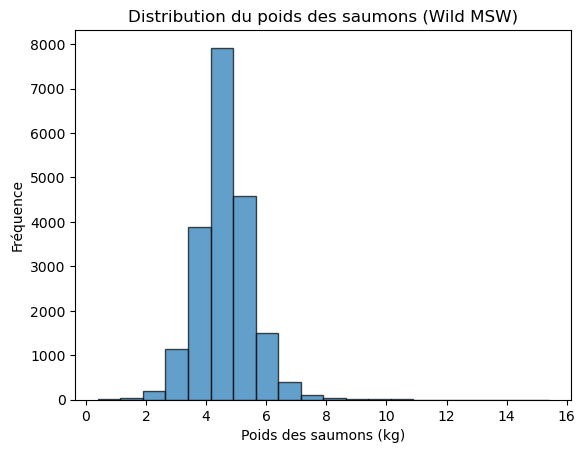

In [36]:
# Histograme
plt.hist(Poids_moyen_saumon, bins=20, edgecolor='black', alpha=0.7)  # Histogramme avec 20 intervalles
plt.xlabel("Poids des saumons (kg)")
plt.ylabel("Fréquence")
plt.title("Distribution du poids des saumons (Wild MSW)")
plt.show()

Observations :
- Distribution en cloche bien marquée avec un pic autour de 4-5 kg
- Legère asymétrie sur la droite (la queue s'étend un peu plus vers les poids élevés).
- Diminution plus progressive après le pic, ce qui suggère qu'il y a quelques grands saumons plus rares.

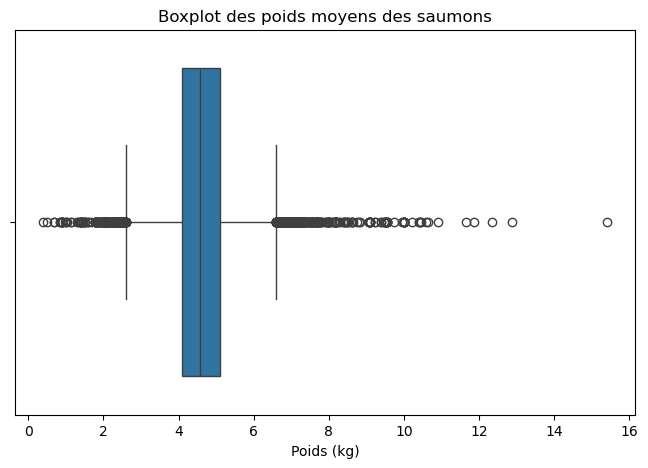

In [38]:
# Boxplot pour identifier les valeurs extrêmes et la dispersion des données.
plt.figure(figsize=(8, 5))
sns.boxplot(x=Poids_moyen_saumon)
plt.title("Boxplot des poids moyens des saumons")
plt.xlabel("Poids (kg)")
plt.show()

Conclusion de la variable 3 :
- Le boxplot révèle la présence de plusieurs valeurs extrêmes au-delà de 10 kg, suggérant des individus atypiques dans l’échantillon.
- La majorité des saumons ont un poids compris entre environ 3 et 6 kg, avec une dispersion relativement contenue autour de la médiane.

## Variable 4 : Farms MSW Weight (kg)

In [41]:
# Caclul de la moyenne 
Farmed_MSW_weight = saumons["Farmed MSW weight (kg)"]

In [42]:
# Statisques descriptives
print("Moyenne :", Farmed_MSW_weight.mean())
print("Médiane :", Farmed_MSW_weight.median())
print("Écart-type :", Farmed_MSW_weight.std())
print ("Variance :", Farmed_MSW_weight.var())
print("Min :", Farmed_MSW_weight.min())
print("Max :", Farmed_MSW_weight.max())
print("Q1 :", Farmed_MSW_weight.quantile(0.25))
print("Q3 :", Farmed_MSW_weight.quantile(0.75))

Moyenne : 0.42519014693171997
Médiane : 0.0
Écart-type : 8.164855096819386
Variance : 66.6648587520575
Min : 0.0
Max : 621.8
Q1 : 0.0
Q3 : 0.0


Intérprétation des statistiques descriptives :
- On remarque une dispersion importante autour de la moyenne.
- Pour l'écart-type et la variance : ces valeurs élevées indiquent une forte dispersion des poids non nuls.
- Concernant les minimums et maximums : il y a des outliers qui faussent l'analyse.
- Q1=0 et Q3=0 indique que plus de 75% des valeurs sont nulles.

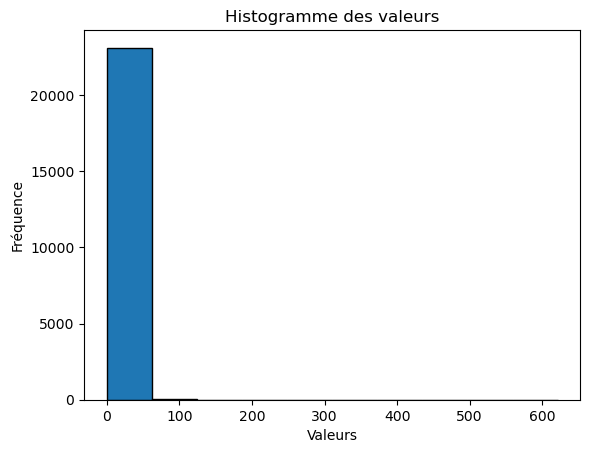

In [44]:
# Créer l'histogramme à partir de la colonne 'valeurs'
plt.hist(saumons['Farmed MSW weight (kg)'], bins=10, range=(0, 621), edgecolor='black')

# Ajouter un titre et des labels
plt.title('Histogramme des valeurs')
plt.xlabel('Valeurs')
plt.ylabel('Fréquence')

# Afficher l'histogramme
plt.show()


Interprétation de l'histogramme : la plus part des valeurs de cette case sont nulles, ce qui explique la fréquence très importante à 0.

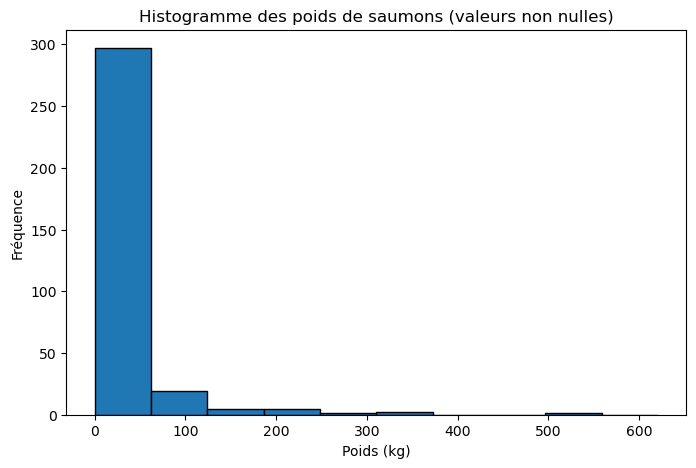

In [46]:
# On réalise un second histogramme en excluant les valeurs nulles pour voir la répartition réelle des fermes qui enregistrent un poids.

# On exclut les valeurs négatives
saumons_non_nul = saumons[saumons["Farmed MSW weight (kg)"] > 0]
plt.figure(figsize=(8, 5))
plt.hist(saumons_non_nul['Farmed MSW weight (kg)'], bins=10, range=(0, 621), edgecolor='black')
plt.title("Histogramme des poids de saumons (valeurs non nulles)")
plt.xlabel("Poids (kg)")
plt.ylabel("Fréquence")
plt.show()

Interprétation du second histogramme (valeurs non-nulles) : la distribution montre une forte inégalité dans les poids enregistrés : la grande majorité est faible, mais quelques valeurs extrêmes existent (ex: 600kg)

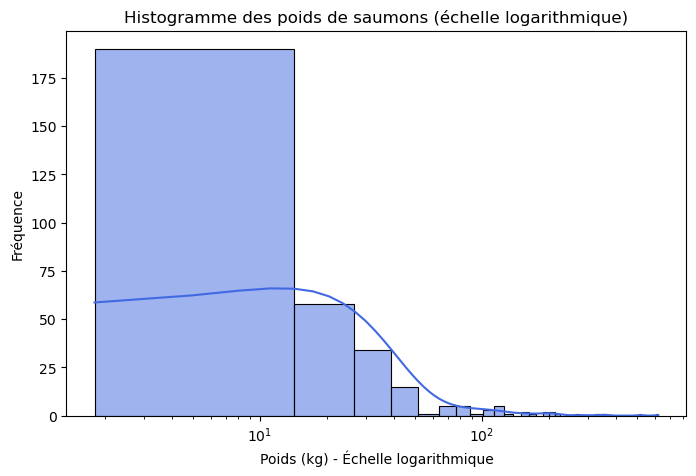

In [48]:
# On poursuit avec un troisième histogramme avec une échelle logarithmique sur l'axe des x afin de mieux visualiser les écarts.

saumons_non_nul_2 = saumons[saumons["Farmed MSW weight (kg)"] > 0]
plt.figure(figsize=(8, 5))
sns.histplot(saumons_non_nul_2["Farmed MSW weight (kg)"], bins=50, kde=True, color="royalblue")

# Appliquer une échelle logarithmique sur l'axe X
plt.xscale("log")

plt.title("Histogramme des poids de saumons (échelle logarithmique)")
plt.xlabel("Poids (kg) - Échelle logarithmique")
plt.ylabel("Fréquence")
plt.show()

Interprétation du troisième histogramme :
- La majorité des poids restent faibles (toujours une concentration vers 1-10 kg).
- Les poids plus élevés (100 kg et plus) sont mieux visibles et ne sont plus écrasés par la forte densité des petites valeurs (comme sur le second histogramme).

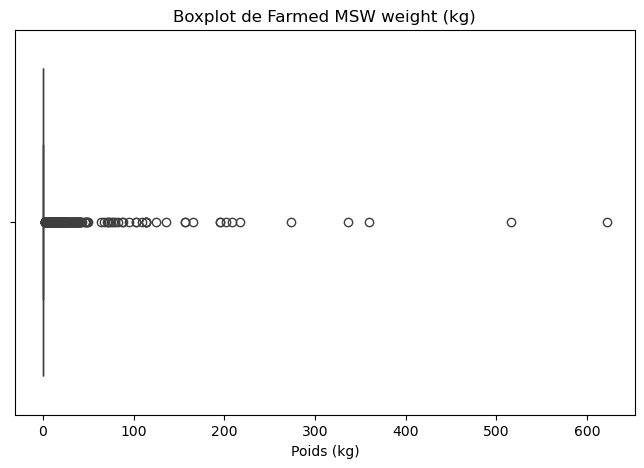

In [50]:
# Création du Boxplot

plt.figure(figsize=(8, 5))
sns.boxplot(x=saumons["Farmed MSW weight (kg)"], showfliers=True)  # Affichage des outliers
plt.title("Boxplot de Farmed MSW weight (kg)")
plt.xlabel("Poids (kg)")
plt.show()

Interprétation du Boxplot : 
- On remarque que la médiane est à 0 kg, confirmant que la majorité des poids des saumons d'élevages sont nuls.
- Il y a des outliers (valeurs extrêmes) qui s'étendent jusqu'à environ 620 kg.

In [9]:
Poids_moyen_saumons_elevage=saumons["Farmed MSW weight (kg)"]/saumons["Farmed MSW number"];
#On extrait le poids moyen des saumons 

In [11]:
# Statisques descriptives
print("Moyenne :", Poids_moyen_saumons_elevage.mean())
print("Médiane :", Poids_moyen_saumons_elevage.median())
print("Écart-type :", Poids_moyen_saumons_elevage.std())
print("Min :", Poids_moyen_saumons_elevage.min())
print("Max :", Poids_moyen_saumons_elevage.max())
print("Q1 :", Poids_moyen_saumons_elevage.quantile(0.25))
print("Q3 :", Poids_moyen_saumons_elevage.quantile(0.75))

Moyenne : 4.363752358381236
Médiane : 4.110204081632653
Écart-type : 1.587295631079995
Min : 1.35
Max : 12.9
Q1 : 3.2
Q3 : 5.05


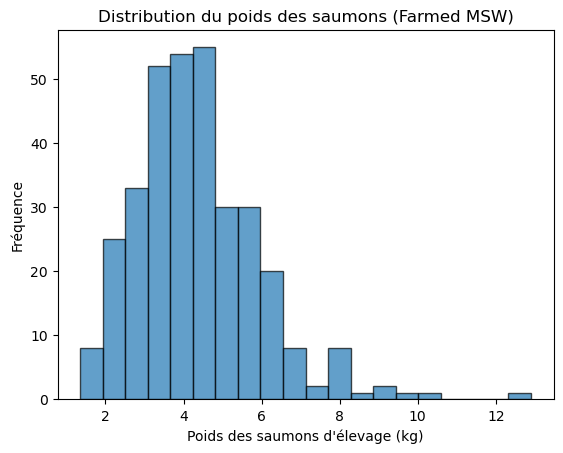

In [13]:
# Histograme
plt.hist(Poids_moyen_saumons_elevage, bins=20, edgecolor='black', alpha=0.7)  # Histogramme avec 20 intervalles
plt.xlabel("Poids des saumons d'élevage (kg)")
plt.ylabel("Fréquence")
plt.title("Distribution du poids des saumons (Farmed MSW)")
plt.show()

## Variable 5 : District 

In [53]:
# Importation des données
District = saumons["District"];

In [54]:
 # Nombre d'occurrences par catégorie 
saumons["District"].value_counts() 

District
Tweed        951
North Esk    838
Nith         791
Cree         722
South Esk    628
            ... 
Ruel           3
Orkney         3
Scaddle        2
Fincastle      2
Arnisdale      1
Name: count, Length: 97, dtype: int64

In [55]:
# Calcul du mode   
saumons["District"].mode() 

0    Tweed
Name: District, dtype: object

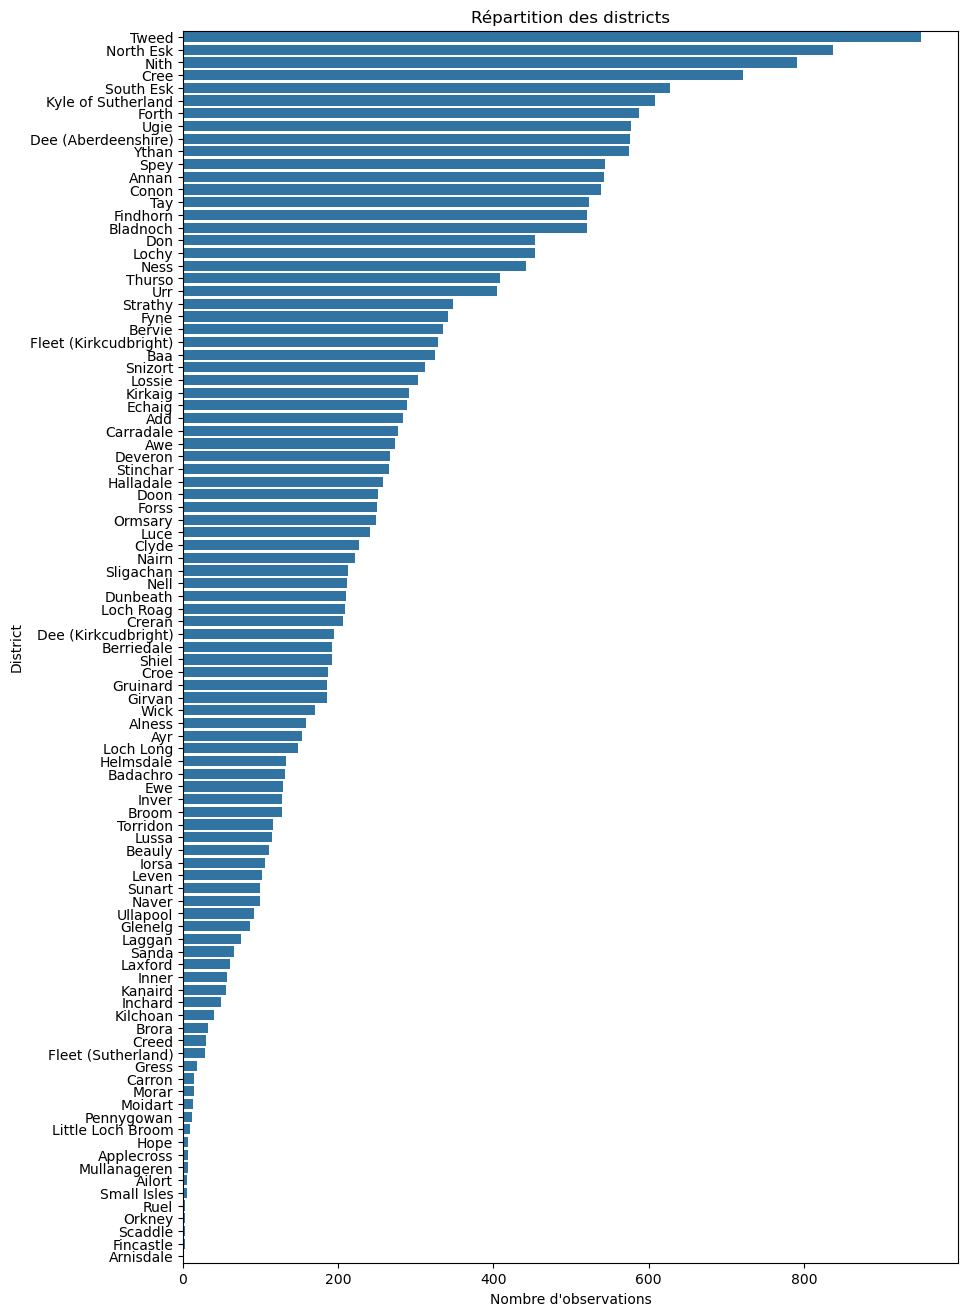

In [56]:
# On trace ensuite un histogramme pour visualiser la répartition 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,16))
sns.countplot(y=saumons["District"], order=saumons["District"].value_counts().index)
plt.xlabel("Nombre d'observations")
plt.ylabel("District")
plt.title("Répartition des districts")
plt.show()

Nous pouvons donc voir sur ce diagramme le nombre de district en fonction de leur type. On constate que certains distrcits ne sont que très peu représentés. 

## Variable 6 : District ID

In [59]:
# Importation des données
District_ID= saumons["District ID"];

In [60]:
# Nombre d'occurrences par catégorie 
saumons["District ID"].value_counts() 

District ID
101.0    951
36.0     838
84.0     791
24.0     722
37.0     628
        ... 
88.0       3
109.0      3
90.0       2
39.0       2
6.0        1
Name: count, Length: 97, dtype: int64

In [61]:
# Calcul du mode 
saumons["District"].mode()

0    Tweed
Name: District, dtype: object

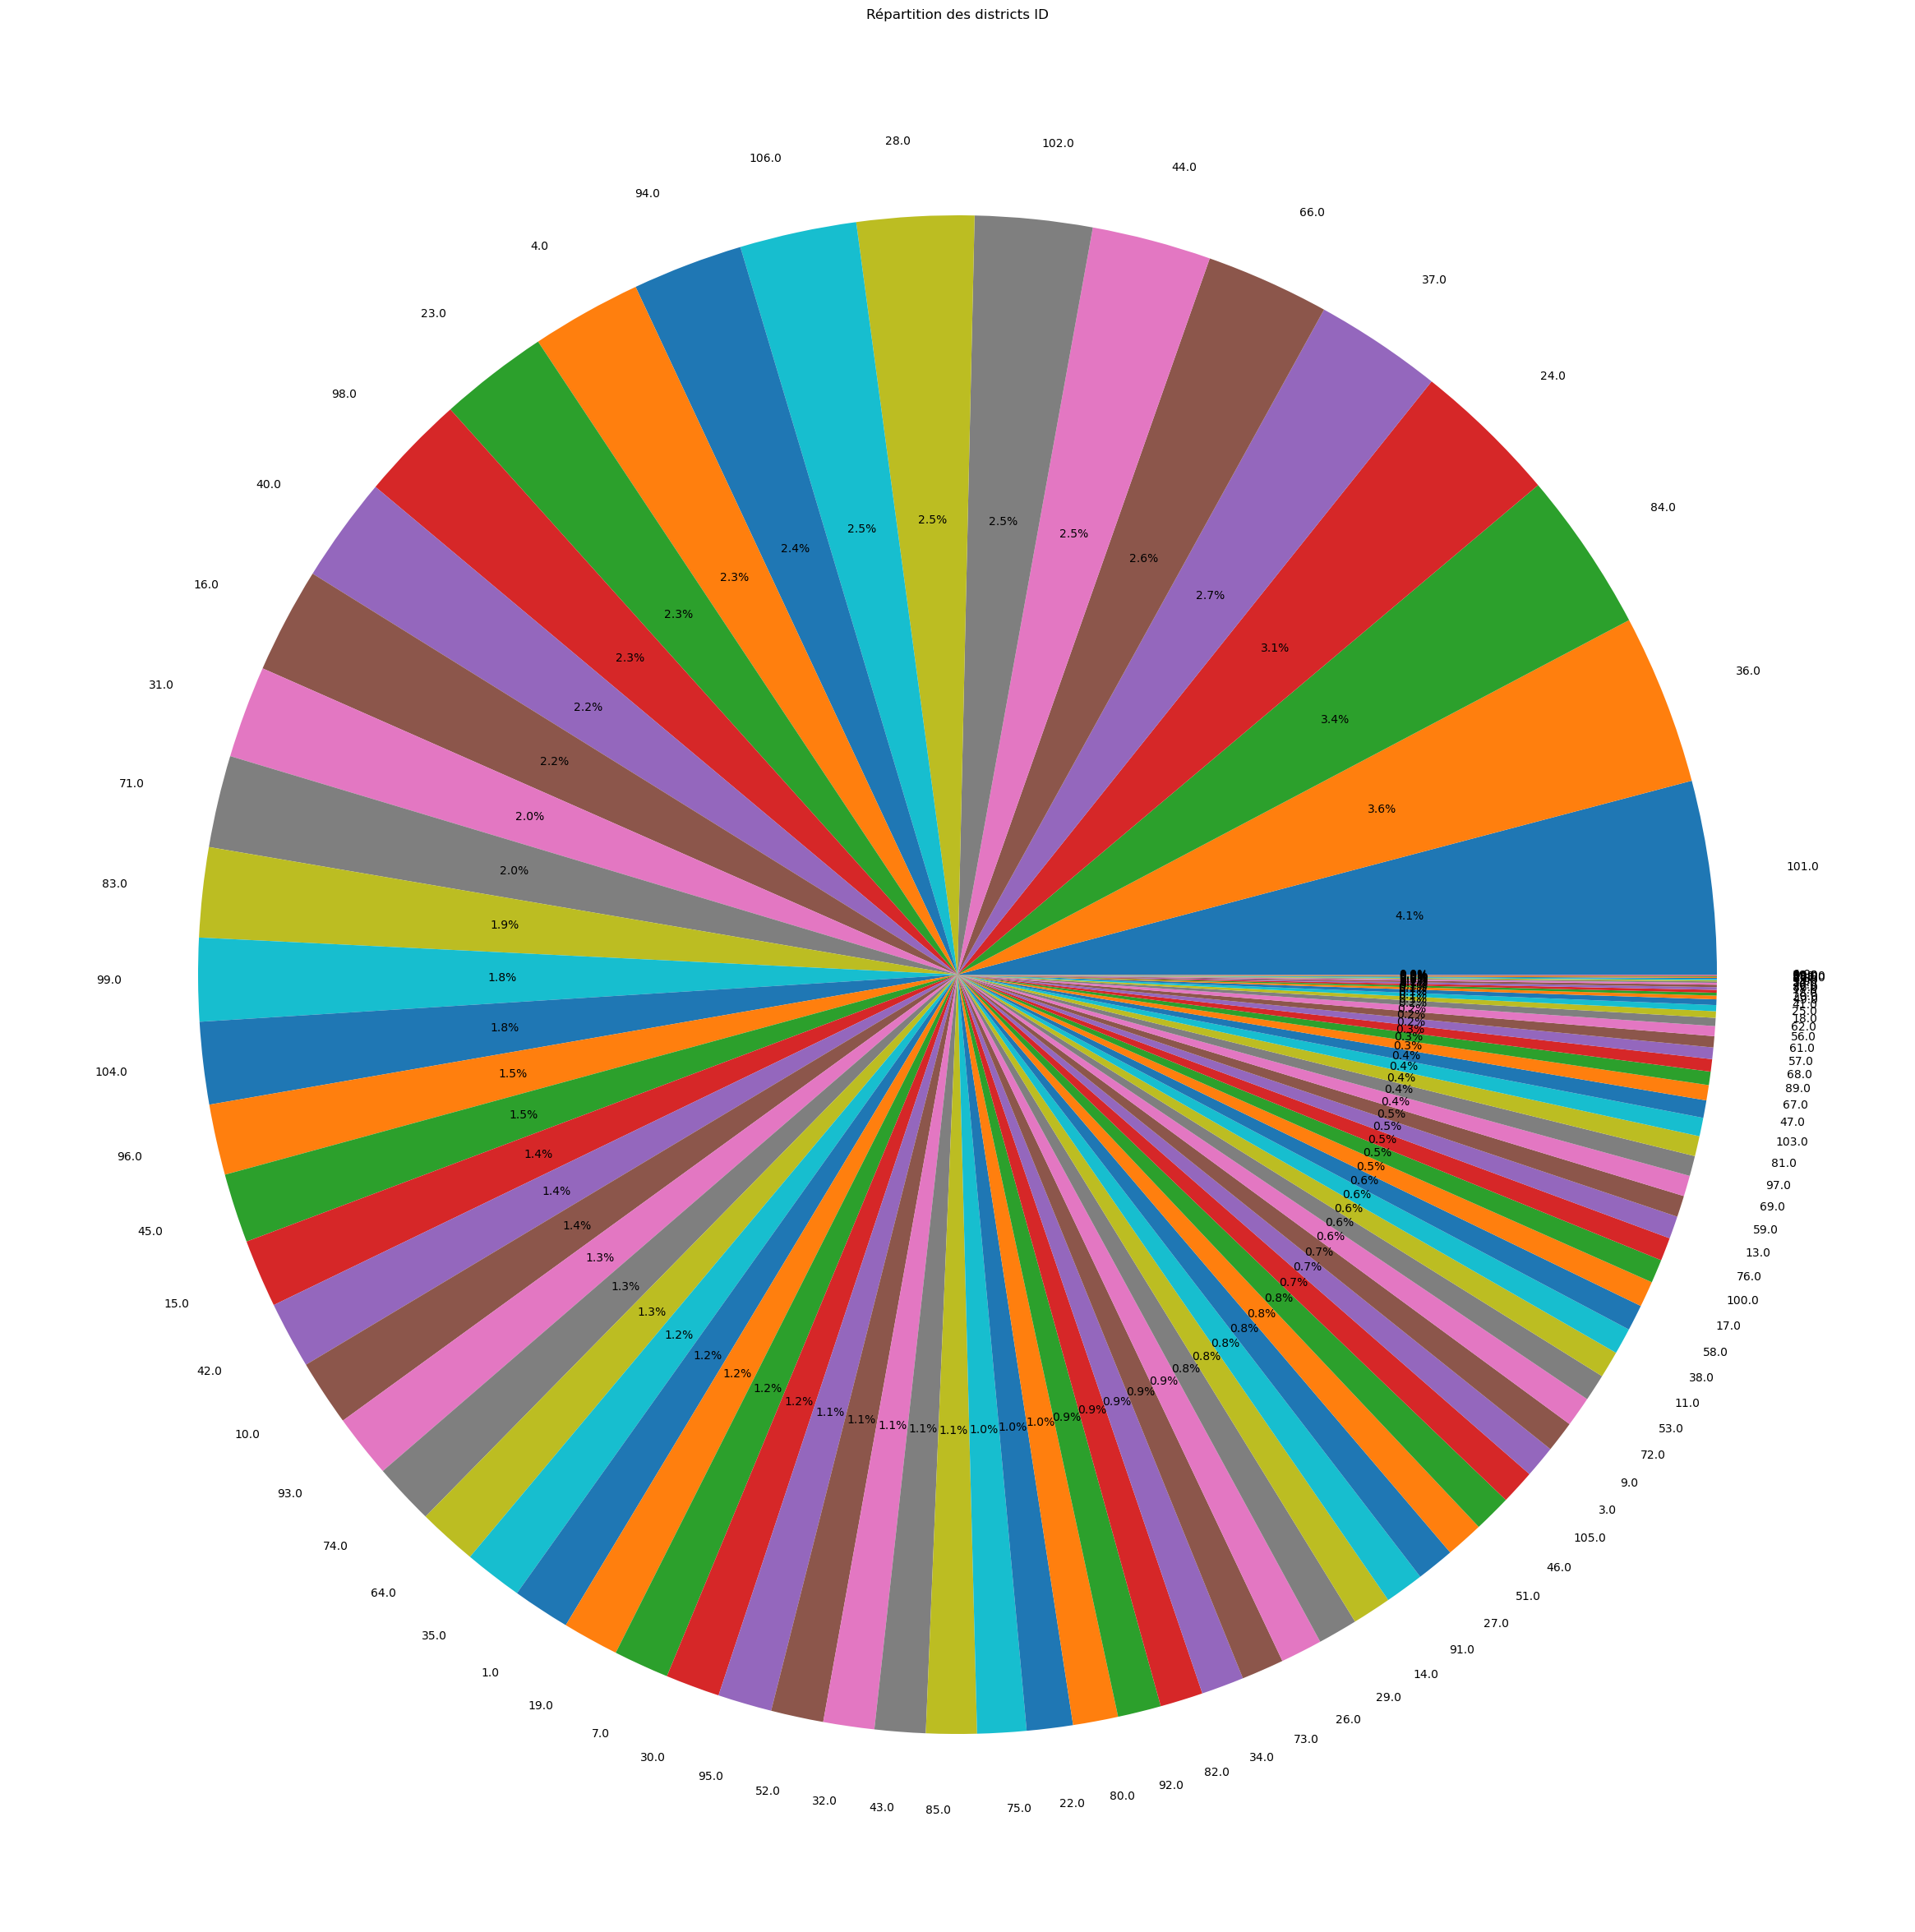

In [62]:
# Affichage d'un diagramme circulaire
saumons["District ID"].value_counts().plot.pie(autopct="%1.1f%%", figsize=(30, 30))
plt.title("Répartition des districts ID")
plt.ylabel("")
plt.show()

L'affichage est ici difficile car nous avons de nombreuses valeurs de distrcit ID peu représentées (en lien avec certains districts peu représentées).
La visualisation sur un diagramme est donc diffcile. 

## Variable 7 : Report order

In [65]:
# Importation des données
Report_Order= saumons["Report order"];

In [66]:
# Nombre d'occurrences par catégorie 
saumons["Report order"].value_counts() 

Report order
1.0      951
5.0      838
98.0     791
94.0     722
4.0      628
        ... 
83.0       3
100.0      3
67.0       2
106.0      2
57.0       1
Name: count, Length: 97, dtype: int64

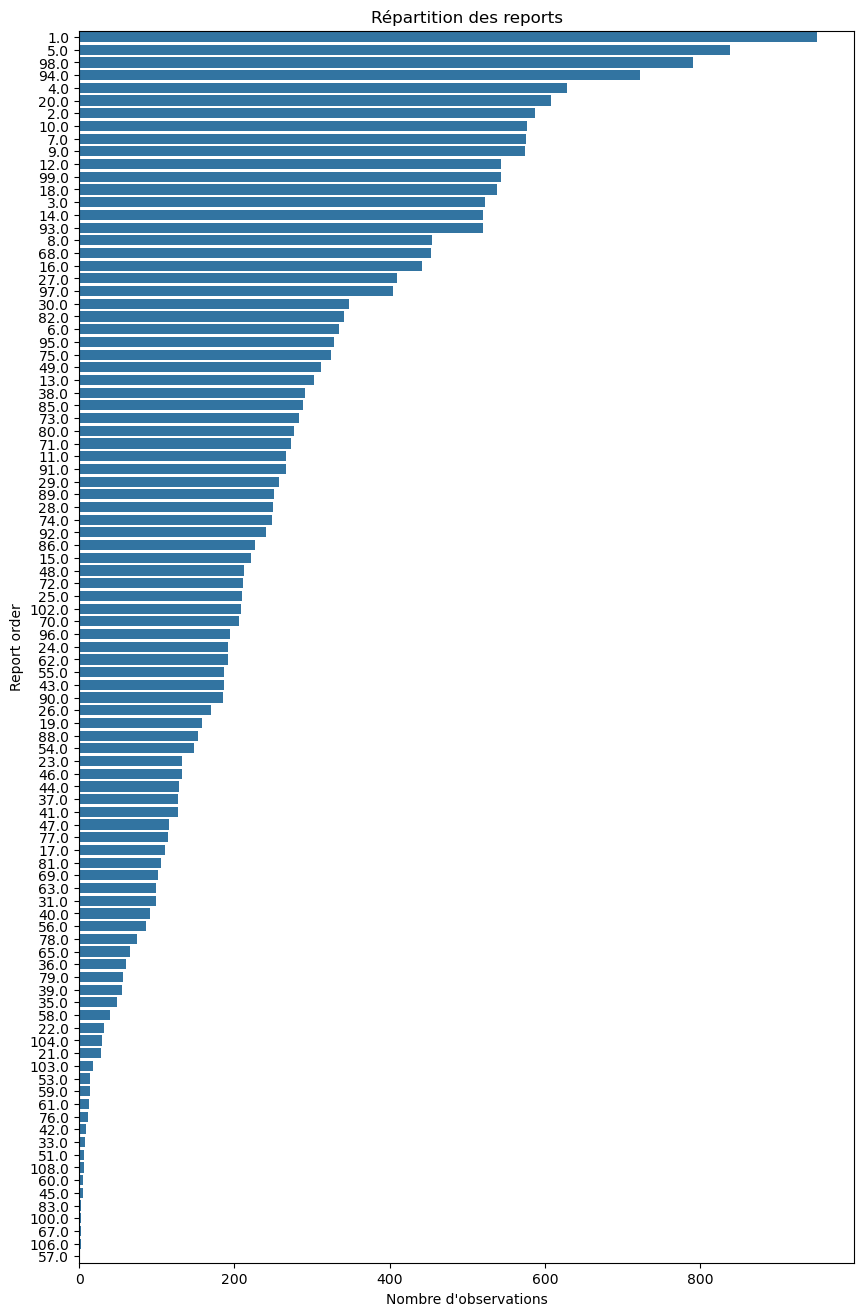

In [67]:
# On trace ensuite un histogramme pour visualiser la répartition 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,16))
sns.countplot(y=saumons["Report order"], order=saumons["Report order"].value_counts().index)
plt.xlabel("Nombre d'observations")
plt.ylabel("Report order")
plt.title("Répartition des reports")
plt.show()

La répartition des reports order suit la même allure que les deux précédentes variables précédemment étudiées. 

## Variable 8 : Region

In [70]:
# Importation des données
Region= saumons["Region"];

In [71]:
# Nombre d'occurrences par catégorie 
saumons["Region"].value_counts() 

Region
North East        3983
Solway            3746
Moray Firth       3105
North             2744
North West        2610
West Coast        2527
Clyde Coast       2096
East              2061
Outer Hebrides     265
Orkney               3
Name: count, dtype: int64

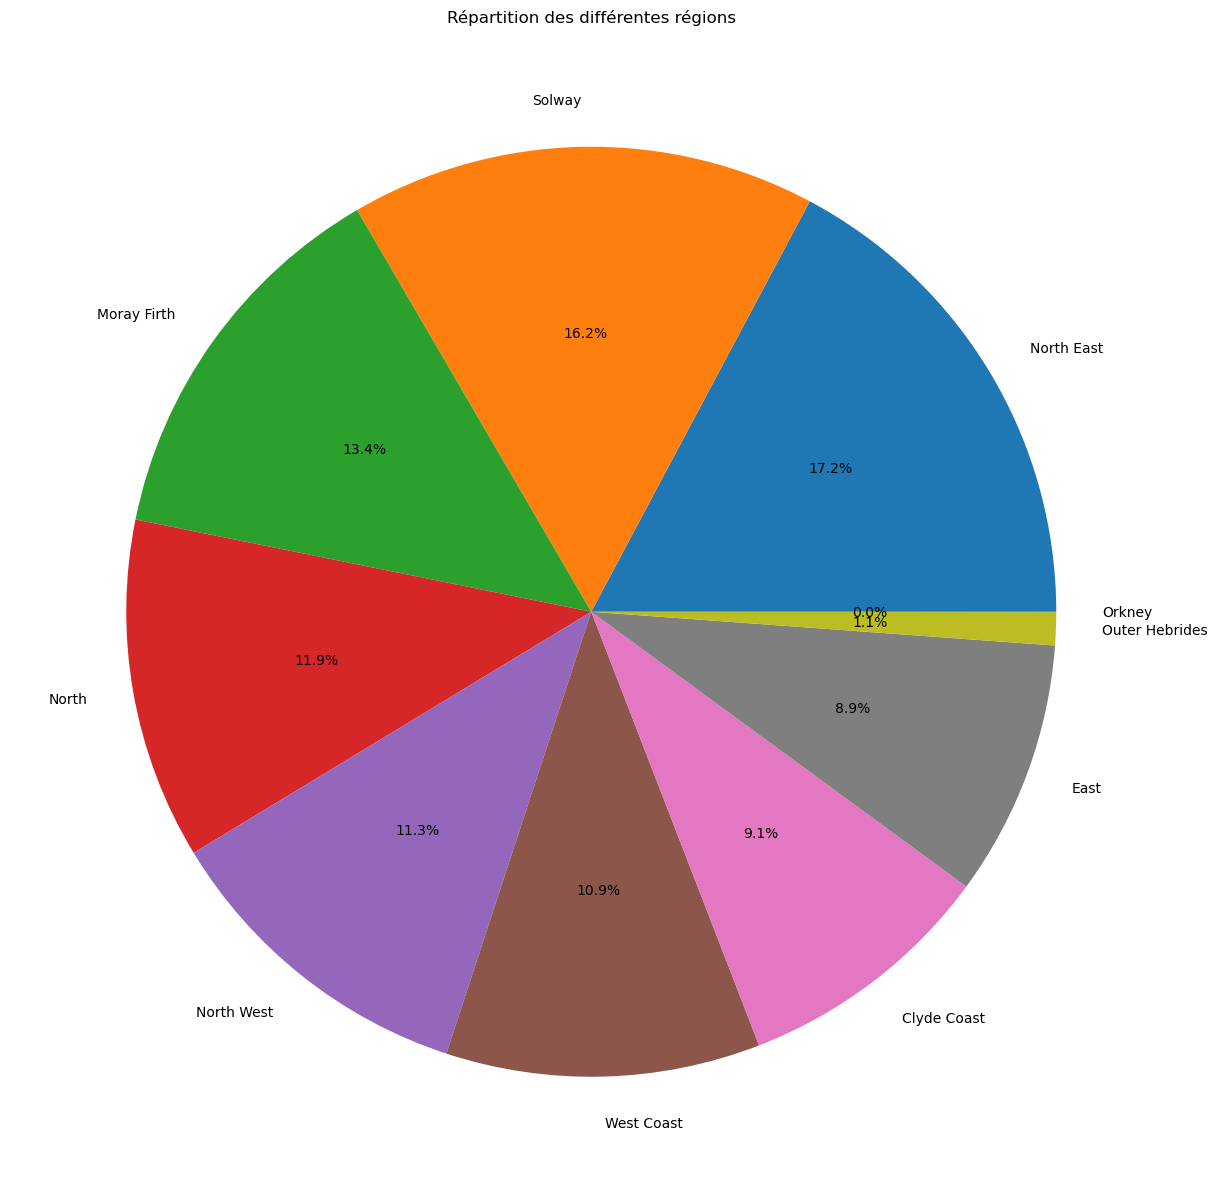

In [72]:
# Affichage d'un diagramme circulaire
saumons["Region"].value_counts().plot.pie(autopct="%1.1f%%", figsize=(15, 20))
plt.title("Répartition des différentes régions")
plt.ylabel("")
plt.show()

In [73]:
# Calcul du mode   
saumons["Region"].mode() 

0    North East
Name: Region, dtype: object

On constate que la région la plus représentée est la "North East". 

## Variable 9 : Method

In [76]:
# Importation des données
Method= saumons["Method"];

In [77]:
# Nombre d'occurrences par catégorie 
saumons["Method"].value_counts() 

Method
Fixed Engine: Retained     13811
Net and Coble: Retained     9291
Fixed Engine: Released        27
Net and Coble: Released       11
Name: count, dtype: int64

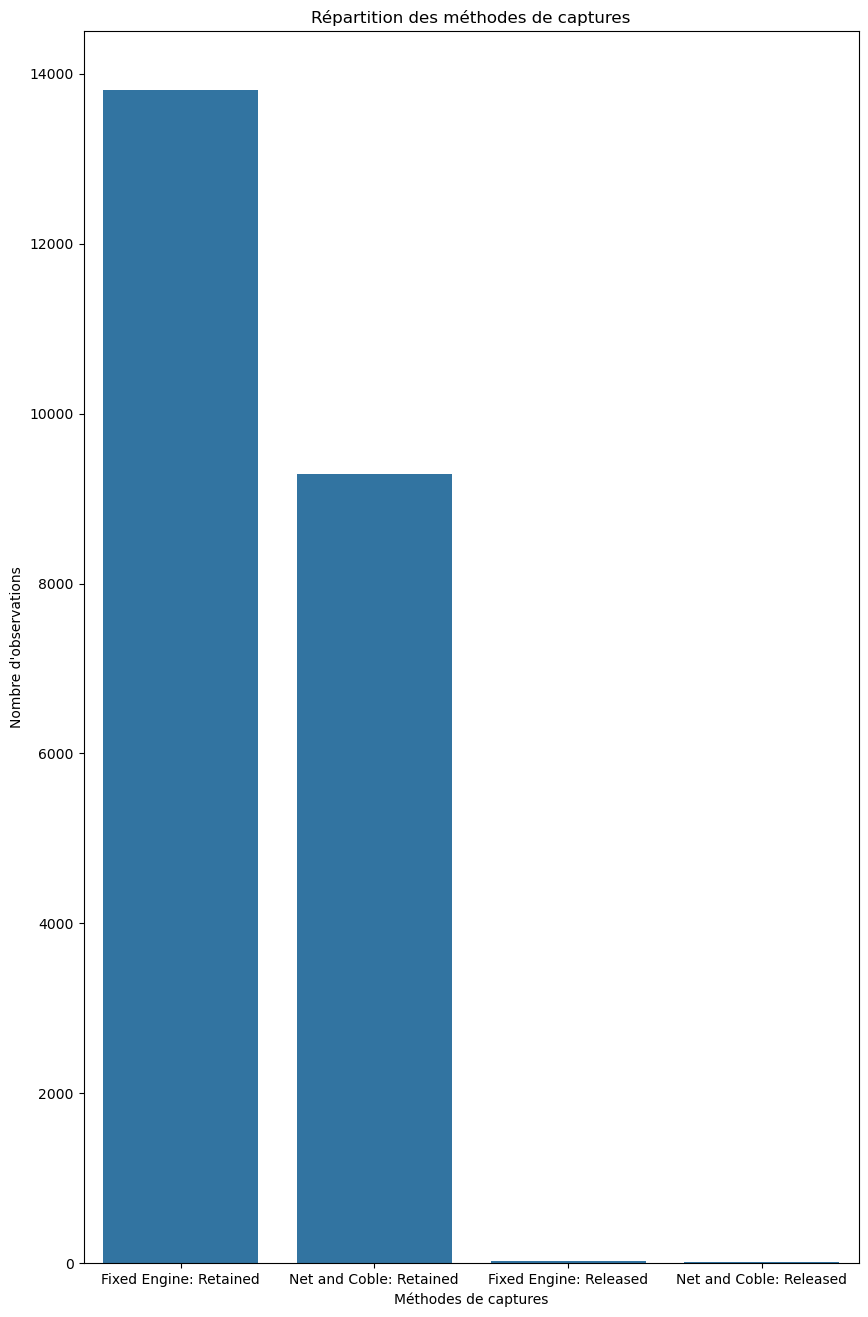

In [78]:
# On trace ensuite un histogramme pour visualiser la répartition 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,16))
ax = sns.countplot(x=saumons["Method"], order=saumons["Method"].value_counts().index)
plt.xlabel("Méthodes de captures")
plt.ylabel("Nombre d'observations")
plt.title("Répartition des méthodes de captures")
plt.show()

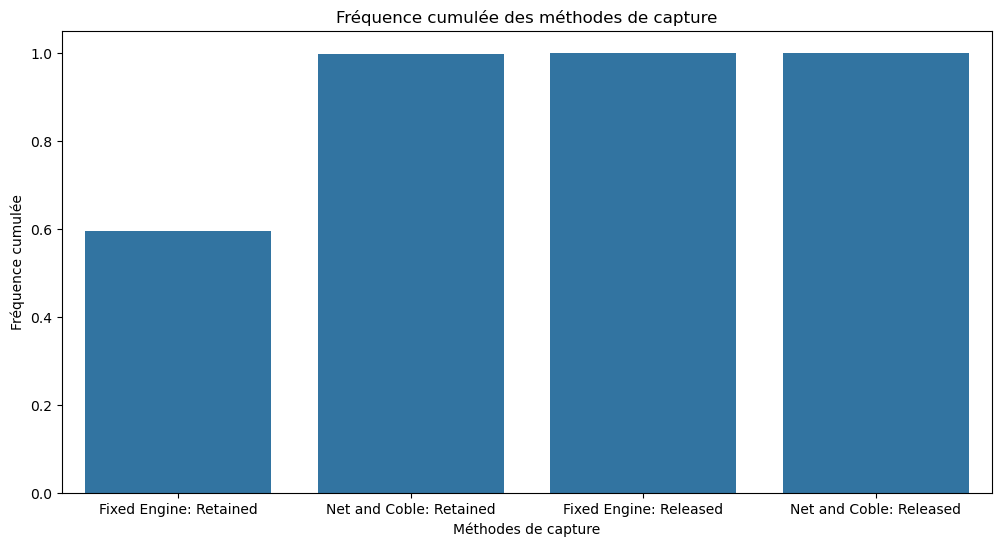

In [79]:
#Création d'un histogramme avec les fréquences cumulées
counts = saumons["Method"].value_counts()
cumulative_frequencies = counts.cumsum() / counts.sum()  # Normalisation en pourcentage
# Création du graphique
plt.figure(figsize=(12, 6))
sns.barplot(x=cumulative_frequencies.index, y=cumulative_frequencies.values)
plt.xlabel("Méthodes de capture")
plt.ylabel("Fréquence cumulée")
plt.title("Fréquence cumulée des méthodes de capture")
plt.show()

Ici, nous pouvons mieux visualiser les différentes méthodes de capture utilisées. On constate la méthode de capture "Net and coble : Released" est la plus utilisée. 

## Variable 10 : Year

In [82]:
# Importation des données
Year= saumons["Year"];

In [83]:
# Nombre d'occurrences par catégorie 
saumons["Year"].value_counts() 

Year
1955.0    550
1956.0    535
1959.0    528
1953.0    525
1965.0    524
         ... 
2016.0     50
2022.0     44
2018.0     43
2020.0     26
2019.0     23
Name: count, Length: 71, dtype: int64

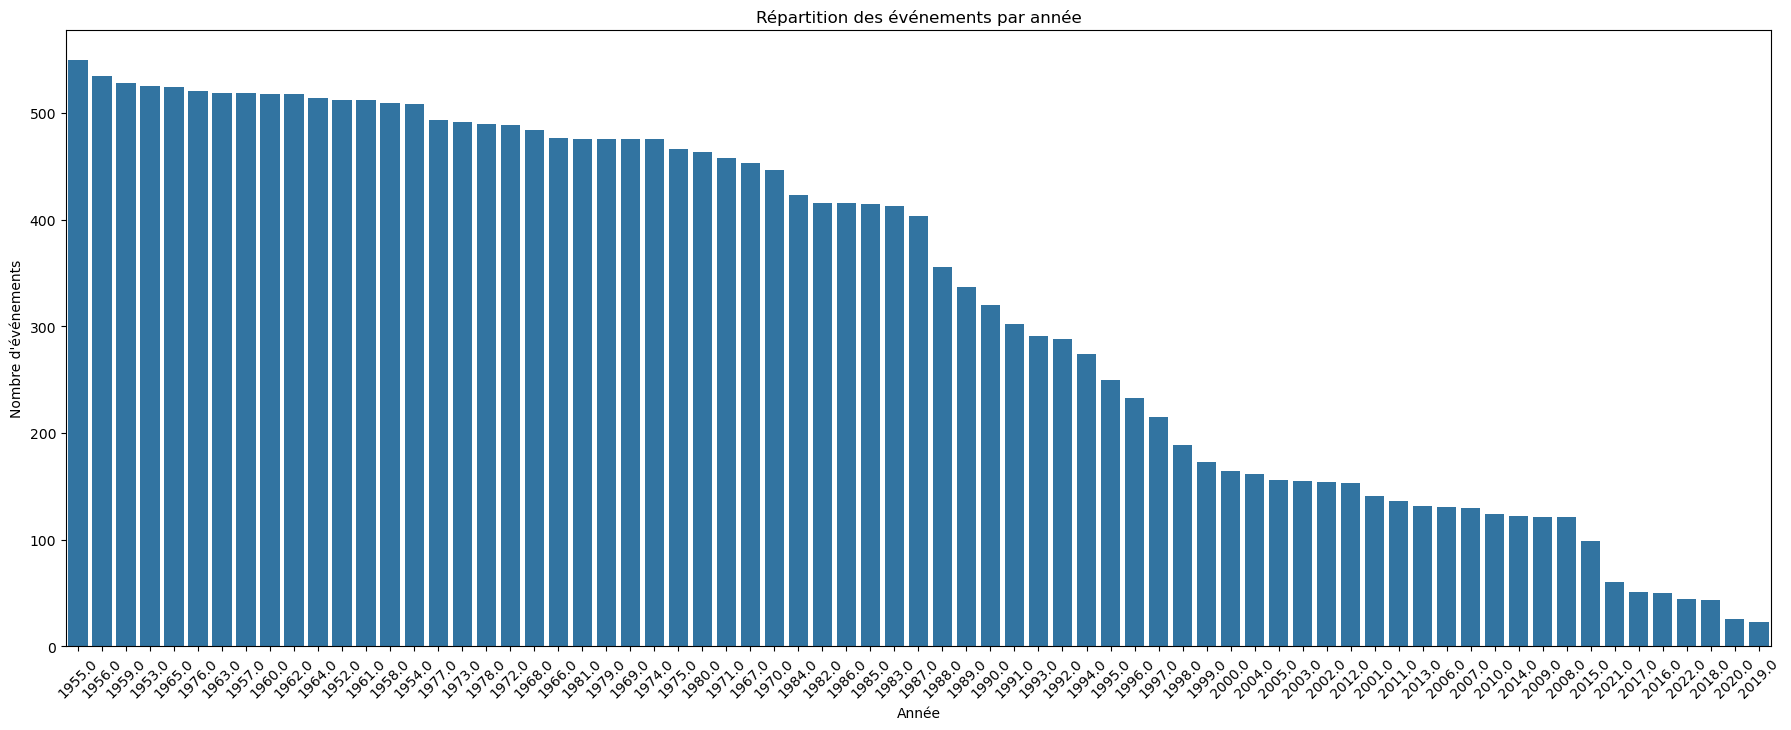

In [84]:
#On visualise les effectifs cumulés par année sur un histogramme
plt.figure(figsize=(22, 8))
sns.countplot(x=saumons["Year"], order=saumons["Year"].value_counts().index)
plt.xlabel("Année")
plt.ylabel("Nombre d'événements")
plt.title("Répartition des événements par année")
plt.xticks(rotation=45)
plt.show()

On constate que le nombre d'évènements diminue alors que le temps avance. Il y a donc moins de prises lors des dernières années. 

## Variable 11 : Month 

In [87]:
mois_ordre = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
saumons['Month'] = pd.Categorical(saumons['Month'], categories=mois_ordre, ordered=True)
# Affichage des modalités uniques
print("Modalités de 'Month' :", saumons['Month'].unique())

Modalités de 'Month' : ['February', 'March', 'April', 'May', 'June', ..., 'August', 'September', 'November', 'October', NaN]
Length: 11
Categories (12, object): ['January' < 'February' < 'March' < 'April' ... 'September' < 'October' < 'November' < 'December']


In [88]:
# Effectifs
effectifs = saumons['Month'].value_counts().sort_index()
print("\nEffectifs :\n", effectifs)


Effectifs :
 Month
January         0
February     1039
March        1461
April        2230
May          3428
June         4462
July         4978
August       4514
September    1026
October         1
November        1
December        0
Name: count, dtype: int64


In [94]:
# Fréquences
frequences = effectifs / effectifs.sum()
print("\nFréquences :\n", frequences.round(4))


Fréquences :
 Month
January      0.0000
February     0.0449
March        0.0631
April        0.0964
May          0.1481
June         0.1928
July         0.2151
August       0.1951
September    0.0443
October      0.0000
November     0.0000
December     0.0000
Name: count, dtype: float64


In [95]:
# Tableau résumé
tableau = pd.DataFrame({'Effectif': effectifs, 'Fréquence': frequences.round(4)})
print("\nTableau résumé :\n", tableau)


Tableau résumé :
            Effectif  Fréquence
Month                         
January           0     0.0000
February       1039     0.0449
March          1461     0.0631
April          2230     0.0964
May            3428     0.1481
June           4462     0.1928
July           4978     0.2151
August         4514     0.1951
September      1026     0.0443
October           1     0.0000
November          1     0.0000
December          0     0.0000


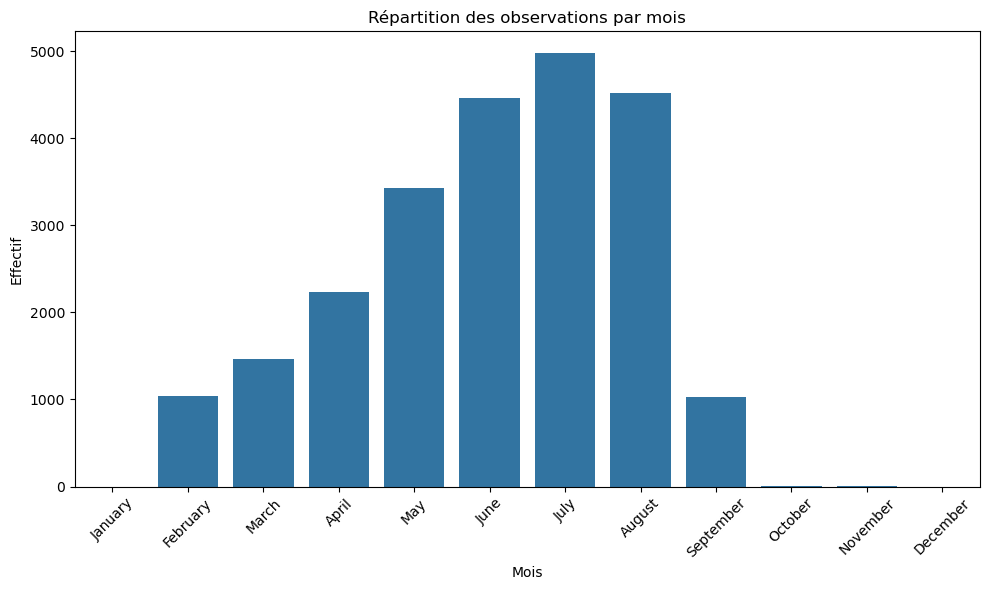

In [96]:
# Affichage graphique
plt.figure(figsize=(10,6))
sns.barplot(x=effectifs.index, y=effectifs.values)
plt.title('Répartition des observations par mois')
plt.xlabel('Mois')
plt.ylabel('Effectif')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

De mai à août, on observe les effectifs les plus élevés, avec un pic en juillet (21,5 % des observations), suivi de juin (19,3 %) et août (19,5 %).

Les mois de janvier, octobre, novembre et décembre comptent très peu voire aucune observation, ce qui suggère une très faible activité ou absence de collecte pendant cette période.

Les mois de février à avril montrent une montée progressive de l’activité, tandis que septembre marque le déclin.

## Variable 12 : Wild MSW number 

In [99]:
# Extraction de la variable
wild_msw = saumons['Wild MSW number']

In [100]:
# Calcul des statistiques descriptives
effectif_total = wild_msw.count()
minimum = wild_msw.min()
maximum = wild_msw.max()
moyenne = wild_msw.mean()
mediane = wild_msw.median()
ecart_type = wild_msw.std()

# Affichage du tableau statistique
print("Statistiques univariées de la variable 'Wild MSW number':\n")
print(f"Effectif total (n) : {effectif_total}")
print(f"Minimum            : {minimum}")
print(f"Maximum            : {maximum}")
print(f"Moyenne            : {moyenne:.2f}")
print(f"Médiane            : {mediane}")
print(f"Écart-type         : {ecart_type:.2f}")

Statistiques univariées de la variable 'Wild MSW number':

Effectif total (n) : 23140
Minimum            : 0.0
Maximum            : 18942.0
Moyenne            : 234.77
Médiane            : 30.0
Écart-type         : 730.54


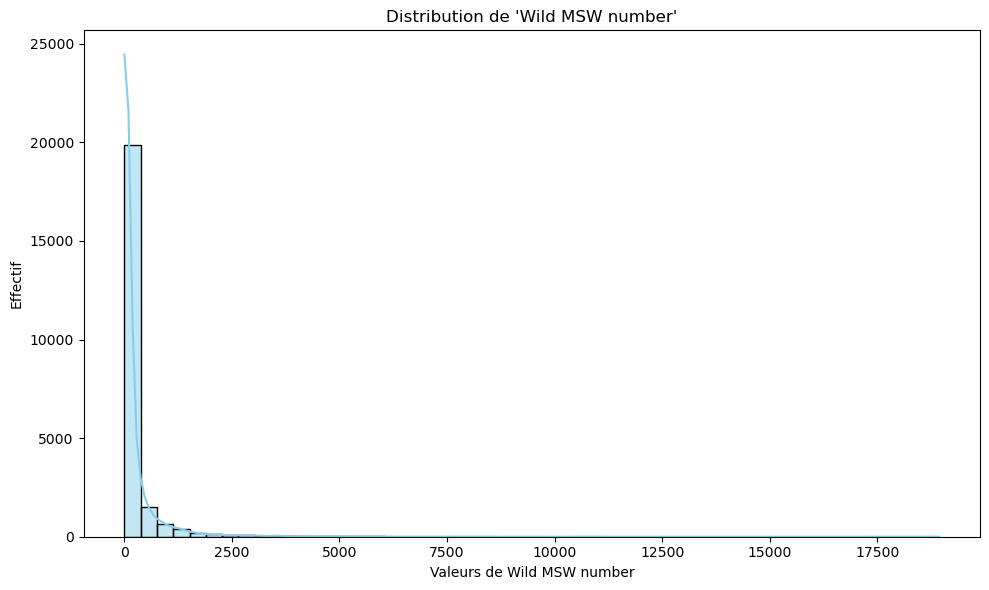

In [101]:
# Affichage graphique : histogramme avec courbe KDE
plt.figure(figsize=(10, 6))
sns.histplot(wild_msw, bins=50, kde=True, color='skyblue')
plt.title("Distribution de 'Wild MSW number'")
plt.xlabel("Valeurs de Wild MSW number")
plt.ylabel("Effectif")
plt.tight_layout()
plt.show()

La variable Wild MSW number représente le nombre de saumons sauvages adultes observés ou capturés.

L’analyse met en évidence les caractéristiques suivantes :

- Effectif total : élevé, ce qui assure une analyse fiable ;
- Valeurs extrêmes : la variable varie entre un minimum de 0 et un maximum très élevé, ce qui indique la présence de cas rares mais massifs ;
- Moyenne relativement élevée, mais médiane plus basse, ce qui traduit une asymétrie vers la droite ;
- Écart-type important, signe d’une forte dispersion des données.

Le graphique en histogramme confirme cette tendance : la distribution est concentrée vers les faibles valeurs avec une longue traîne vers les grandes valeurs. Cela signifie que la majorité des observations porte sur un faible nombre de saumons, mais quelques cas isolés présentent des pics très importants.

## Variable 13 : Wild 1SW Number

In [104]:
# Extraction de la variable 
wild_1sw = saumons['Wild 1SW number']

In [105]:
# Statistiques descriptives
effectif_total = wild_1sw.count()
minimum = wild_1sw.min()
maximum = wild_1sw.max()
moyenne = wild_1sw.mean()
mediane = wild_1sw.median()
ecart_type = wild_1sw.std()

# Affichage des statistiques
print("Statistiques univariées de la variable 'Wild 1SW number':\n")
print(f"Effectif total (n) : {effectif_total}")
print(f"Minimum            : {minimum}")
print(f"Maximum            : {maximum}")
print(f"Moyenne            : {moyenne:.2f}")
print(f"Médiane            : {mediane}")
print(f"Écart-type         : {ecart_type:.2f}")

Statistiques univariées de la variable 'Wild 1SW number':

Effectif total (n) : 23140
Minimum            : 0.0
Maximum            : 34633.0
Moyenne            : 346.50
Médiane            : 8.0
Écart-type         : 1308.25


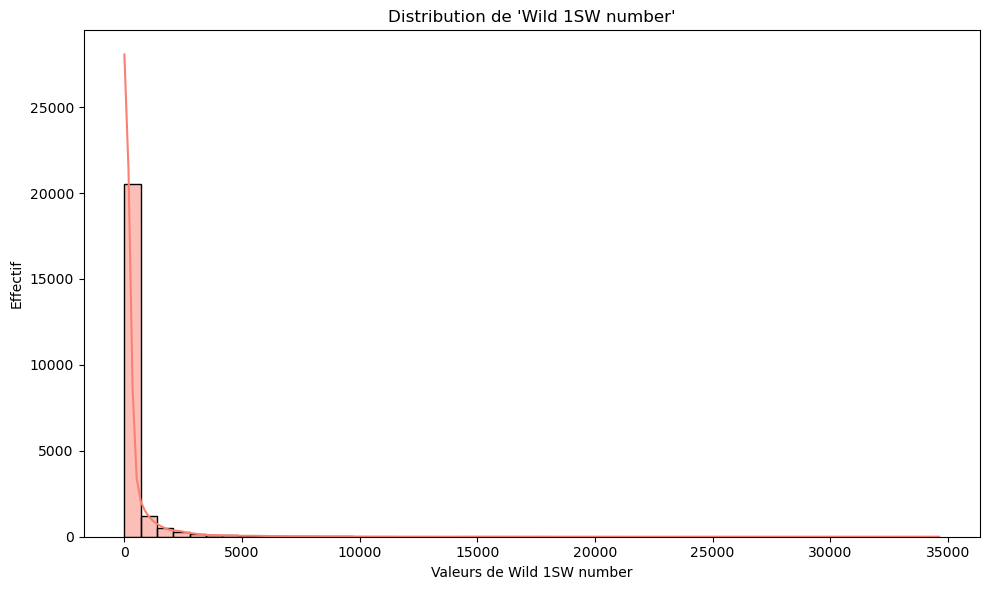

In [107]:
# Affichage graphique
plt.figure(figsize=(10, 6))
sns.histplot(wild_1sw, bins=50, kde=True, color='salmon')
plt.title("Distribution de 'Wild 1SW number'")
plt.xlabel("Valeurs de Wild 1SW number")
plt.ylabel("Effectif")
plt.tight_layout()
plt.show()

La variable Wild 1SW number représente le nombre de saumons sauvages d’un an en mer.

L’analyse statistique révèle les éléments suivants :

- Les valeurs varient fortement, allant de 0 jusqu’à des effectifs très importants, avec une moyenne relativement modérée, mais une médiane plus basse, traduisant une asymétrie positive.
- L’écart-type élevé met en évidence une forte dispersion, caractéristique de données hétérogènes.
- Le graphique de distribution confirme une asymétrie marquée à droite : la majorité des observations concerne de petits effectifs.

## Variable 14 : Wild 1SW Weight(kg) 

In [110]:
# Extraction et nettoyage
wild_1sw_weight = saumons['Wild 1SW weight (kg)']

In [111]:
# Statistiques descriptives
print("Statistiques univariées de 'Wild 1SW weight (kg)':\n")
print(f"Effectif total       : {wild_1sw_weight.count()}")
print(f"Minimum              : {wild_1sw_weight.min():.2f} kg")
print(f"Maximum              : {wild_1sw_weight.max():.2f} kg")
print(f"Moyenne              : {wild_1sw_weight.mean():.2f} kg")
print(f"Médiane              : {wild_1sw_weight.median():.2f} kg")
print(f"Écart-type           : {wild_1sw_weight.std():.2f} kg")

Statistiques univariées de 'Wild 1SW weight (kg)':

Effectif total       : 23140
Minimum              : 0.00 kg
Maximum              : 103010.80 kg
Moyenne              : 881.93 kg
Médiane              : 19.50 kg
Écart-type           : 3426.44 kg


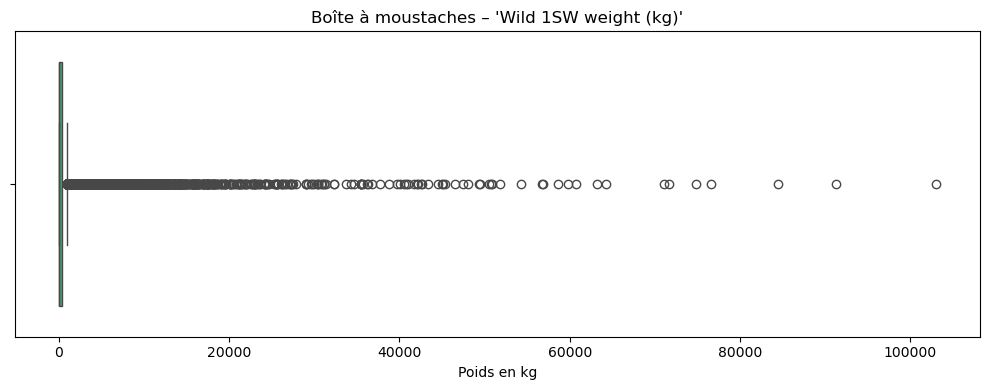

In [112]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=wild_1sw_weight, color='mediumseagreen')
plt.title("Boîte à moustaches – 'Wild 1SW weight (kg)'")
plt.xlabel("Poids en kg")
plt.tight_layout()
plt.show()

La variable Wild 1SW weight représente le poids des saumons sauvages d'un an en mer.

L'analyse statistique révèle :
- Un poids maximum particulièrement important.
- Une médiane à 19,5 qui appuie encore plus le caractère atypique du poids maximum
- Un écart-type supérieur à la médiane qui montre une grande disparité dans les valeurs après avoir dépassé la médiane.

### Variable 15 : Sea Trout number

In [115]:
# Extraction de la variable 
Sea_T_Number = saumons['Sea trout number']

In [116]:
# Statistiques descriptives
effectif_total = Sea_T_Number.count()
minimum = Sea_T_Number.min()
maximum = Sea_T_Number.max()
moyenne = Sea_T_Number.mean()
mediane = Sea_T_Number.median()
ecart_type = Sea_T_Number.std()

# Affichage des statistiques
print("Statistiques univariées de la variable 'Sea Trout Number':\n")
print(f"Effectif total (n) : {effectif_total}")
print(f"Minimum            : {minimum}")
print(f"Maximum            : {maximum}")
print(f"Moyenne            : {moyenne:.2f}")
print(f"Médiane            : {mediane}")
print(f"Écart-type         : {ecart_type:.2f}")

Statistiques univariées de la variable 'Sea Trout Number':

Effectif total (n) : 23140
Minimum            : 0.0
Maximum            : 26126.0
Moyenne            : 229.06
Médiane            : 6.0
Écart-type         : 1026.37


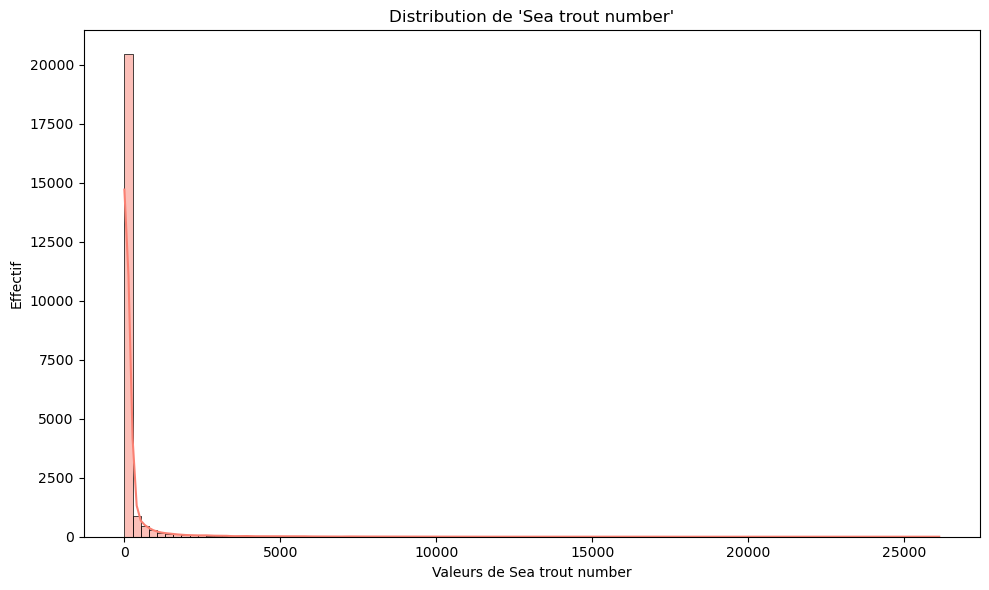

In [118]:
# Affichage graphique
plt.figure(figsize=(10, 6))
sns.histplot(Sea_T_Number, bins=100, kde=True, color='salmon')
plt.title("Distribution de 'Sea trout number'")
plt.xlabel("Valeurs de Sea trout number")
plt.ylabel("Effectif")
plt.tight_layout()
plt.show()

La variable Sea trout number représente le nombre de truites en mer.

L'analyse statistique révèle :
- Une médiane à 6 qui montre une forte concentration des effectifs en-dessous de 6.
- Un écart-type et un maximum tous deux très élevés qui montrent une grande hétérogénéité des valeurs après le 6.


### Variable 16 : Sea Trout Weight (kg) 

In [121]:
# Extraction et nettoyage
Sea_Trout_Weight = saumons['Sea trout weight (kg)']

In [122]:
# Statistiques descriptives
print("Statistiques univariées de 'Sea trout weight (kg)':\n")
print(f"Effectif total       : {Sea_Trout_Weight.count()}")
print(f"Minimum              : {Sea_Trout_Weight.min():.2f} kg")
print(f"Maximum              : {Sea_Trout_Weight.max():.2f} kg")
print(f"Moyenne              : {Sea_Trout_Weight.mean():.2f} kg")
print(f"Médiane              : {Sea_Trout_Weight.median():.2f} kg")
print(f"Écart-type           : {Sea_Trout_Weight.std():.2f} kg")

Statistiques univariées de 'Sea trout weight (kg)':

Effectif total       : 23140
Minimum              : 0.00 kg
Maximum              : 46142.60 kg
Moyenne              : 258.01 kg
Médiane              : 6.40 kg
Écart-type           : 1306.41 kg


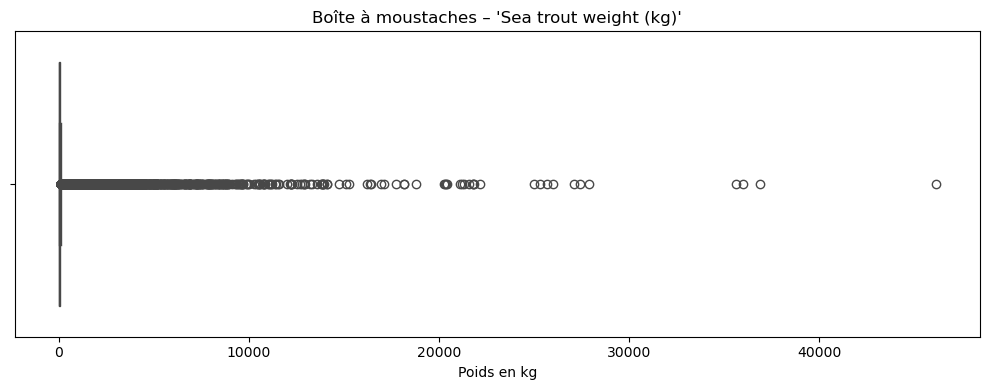

In [123]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=Sea_Trout_Weight, color='mediumseagreen')
plt.title("Boîte à moustaches – 'Sea trout weight (kg)'")
plt.xlabel("Poids en kg")
plt.tight_layout()
plt.show()

La variable Sea trout weight représente le poids des truites de mer pêchées.

L'analyse statistique révèle, de même que pour la quantité, une médiane extrêment faible par rapport à l'écart-type et la moyenne.
On voit que les valeurs extrêmes sont très rares ce qui montre l'importance de la concentration des valeurs en-dessous de 20000kg.

### Variable 17 : Finnock number

In [126]:
# Extraction de la variable 
finn_number = saumons['Finnock number']

In [127]:
# Statistiques descriptives
effectif_total = finn_number.count()
minimum = finn_number.min()
maximum = finn_number.max()
moyenne = finn_number.mean()
mediane = finn_number.median()
ecart_type = finn_number.std()

# Affichage des statistiques
print("Statistiques univariées de la variable 'Finnock number':\n")
print(f"Effectif total (n) : {effectif_total}")
print(f"Minimum            : {minimum}")
print(f"Maximum            : {maximum}")
print(f"Moyenne            : {moyenne:.2f}")
print(f"Médiane            : {mediane}")
print(f"Écart-type         : {ecart_type:.2f}")

Statistiques univariées de la variable 'Finnock number':

Effectif total (n) : 23140
Minimum            : 0.0
Maximum            : 5.0
Moyenne            : 0.00
Médiane            : 0.0
Écart-type         : 0.09


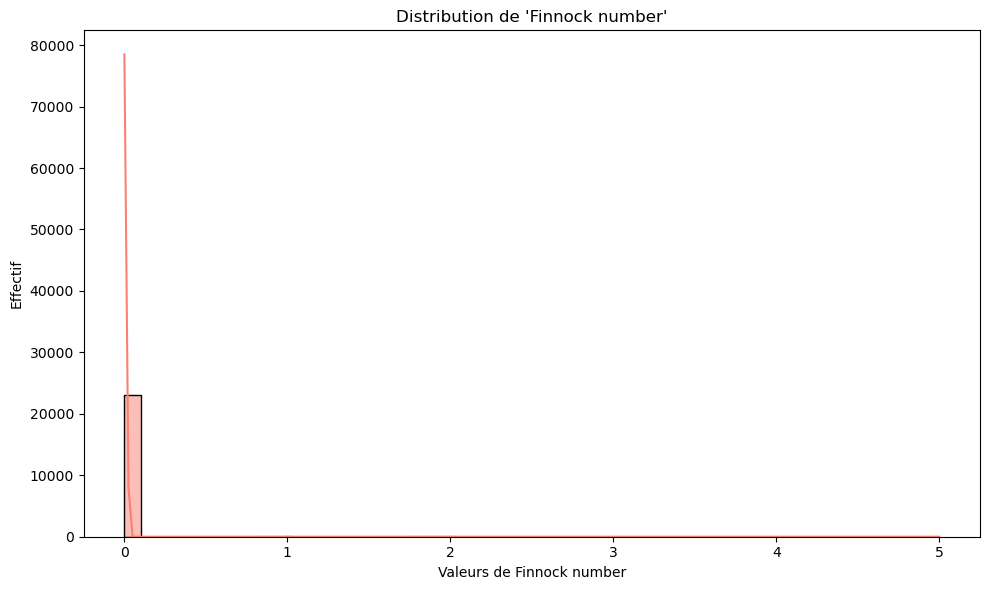

In [128]:
# Affichage graphique
plt.figure(figsize=(10, 6))
sns.histplot(finn_number, bins=50, kde=True, color='salmon')
plt.title("Distribution de 'Finnock number'")
plt.xlabel("Valeurs de Finnock number")
plt.ylabel("Effectif")
plt.tight_layout()
plt.show()

La variable Finnock number représente la quantité de jeunes truites de mer.
L'analyse statistique montre une très faible quantité de finnock pêchés. au total, la moyenne et la médiane étant 0, il n'y en a presque jamais de pêchés.

### Variable 18 : Finnock weight (kg) 

In [131]:
# Extraction et nettoyage
finn_Weight = saumons['Finnock weight (kg)']

In [132]:
# Statistiques descriptives
print("Statistiques univariées de 'Finnock weight (kg)':\n")
print(f"Effectif total       : {finn_Weight.count()}")
print(f"Minimum              : {finn_Weight.min():.2f} kg")
print(f"Maximum              : {finn_Weight.max():.2f} kg")
print(f"Moyenne              : {finn_Weight.mean():.2f} kg")
print(f"Médiane              : {finn_Weight.median():.2f} kg")
print(f"Écart-type           : {finn_Weight.std():.2f} kg")

Statistiques univariées de 'Finnock weight (kg)':

Effectif total       : 23140
Minimum              : 0.00 kg
Maximum              : 5.70 kg
Moyenne              : 0.00 kg
Médiane              : 0.00 kg
Écart-type           : 0.08 kg


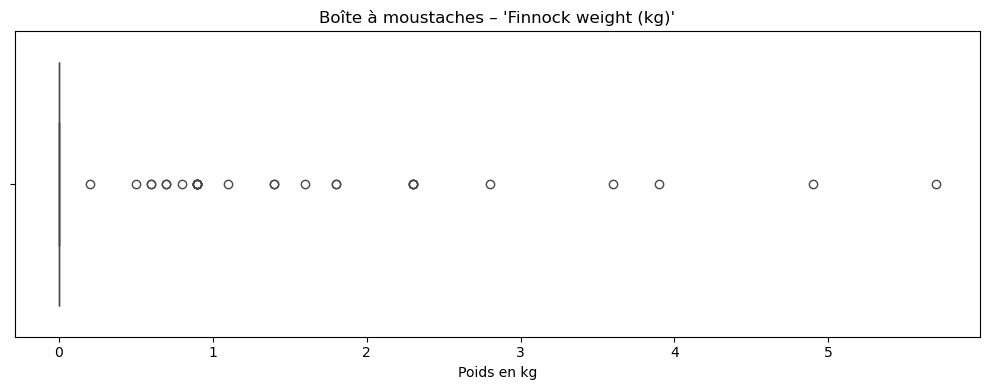

In [133]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=finn_Weight, color='mediumseagreen')
plt.title("Boîte à moustaches – 'Finnock weight (kg)'")
plt.xlabel("Poids en kg")
plt.tight_layout()
plt.show()

La variable Finnock weight représente le poids des jeunes truites pêchées, ces faibles valeurs son cohérentes avec l'espèce que nous étudions. Par ailleurs les valeurs sont réparties de façon assez hétérogènes entre 0 et 5 avec une concentration légèrement plus importante entre 0 et 2.


### Variable 19 : Farmed MSW number 

In [136]:
# Extraction et nettoyage
farm_nb = saumons['Farmed MSW number']

In [137]:
# Statistiques descriptives
print("Statistiques univariées de 'Farmed MSW number':\n")
print(f"Effectif total       : {farm_nb.count()}")
print(f"Minimum              : {farm_nb.min():.2f} ")
print(f"Maximum              : {farm_nb.max():.2f} ")
print(f"Moyenne              : {farm_nb.mean():.2f} ")
print(f"Médiane              : {farm_nb.median():.2f} ")
print(f"Écart-type           : {farm_nb.std():.2f} ")

Statistiques univariées de 'Farmed MSW number':

Effectif total       : 23140
Minimum              : 0.00 
Maximum              : 129.00 
Moyenne              : 0.10 
Médiane              : 0.00 
Écart-type           : 1.76 


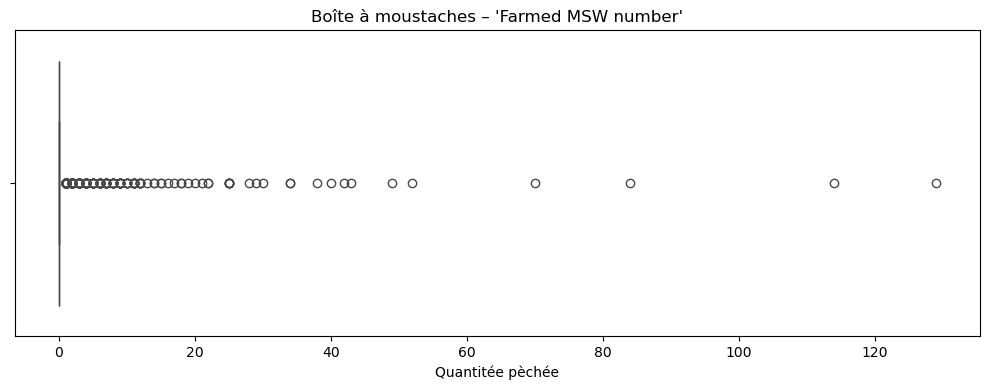

In [138]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=farm_nb, color='mediumseagreen')
plt.title("Boîte à moustaches – 'Farmed MSW number'")
plt.xlabel("Quantitée pèchée")
plt.tight_layout()
plt.show()

La variable Farmed MSW number représente le nombre de saumons de plusieurs années pêchés.
L'étude statistique nous montre une concentration très importante entre 0 et 20 avec des valeurs maximales très importantes et éloignées de la médiane.


### Variable 20 : Farmed 1SW number 

In [141]:
# Extraction de la variable 
farm_nb = saumons['Farmed 1SW number']

In [142]:
# Statistiques descriptives
effectif_total = farm_nb.count()
minimum = farm_nb.min()
maximum = farm_nb.max()
moyenne = farm_nb.mean()
mediane = farm_nb.median()
ecart_type = farm_nb.std()

# Affichage des statistiques
print("Statistiques univariées de la variable 'Farmed 1SW number':\n")
print(f"Effectif total (n) : {effectif_total}")
print(f"Minimum            : {minimum}")
print(f"Maximum            : {maximum}")
print(f"Moyenne            : {moyenne:.2f}")
print(f"Médiane            : {mediane}")
print(f"Écart-type         : {ecart_type:.2f}")

Statistiques univariées de la variable 'Farmed 1SW number':

Effectif total (n) : 23140
Minimum            : 0.0
Maximum            : 209.0
Moyenne            : 0.11
Médiane            : 0.0
Écart-type         : 2.22


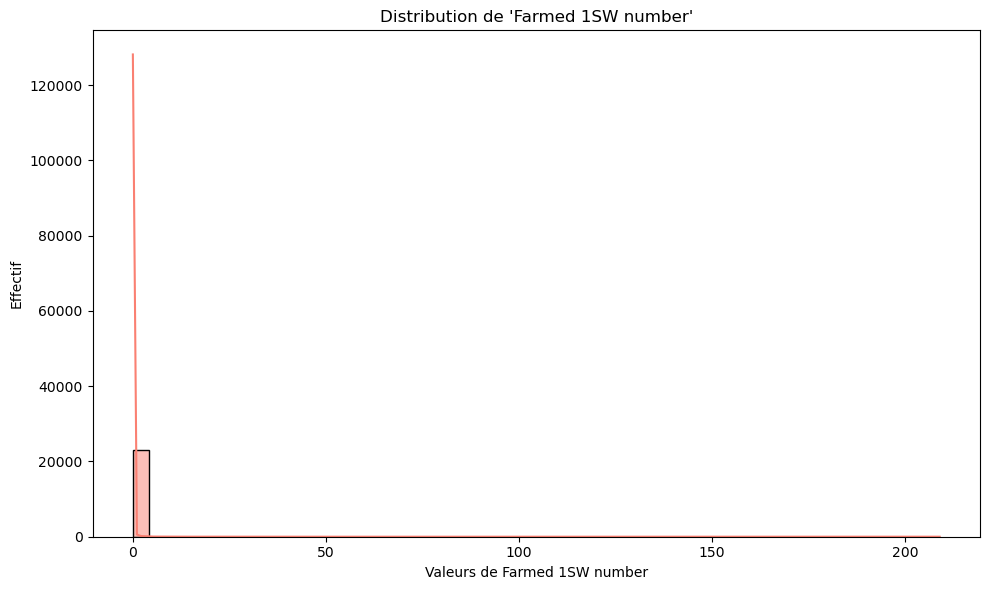

In [143]:
# Affichage graphique
plt.figure(figsize=(10, 6))
sns.histplot(farm_nb, bins=50, kde=True, color='salmon')
plt.title("Distribution de 'Farmed 1SW number'")
plt.xlabel("Valeurs de Farmed 1SW number")
plt.ylabel("Effectif")
plt.tight_layout()
plt.show()

La variable Farmed 1SW number représente le nombre de saumons ayant vécu un hiver en mer. 
L'étude statistique nous montre des valeurs très faibles par rapport à l'effectif total, la moyenne est proche de 0 et la médiane est de 0 ce qui montre une majorité de quantité nulle dans ce cas, mais des valeurs extrêmes qui sont assez importantes.

### Variable 21 : Farmed 1SW weight (kg) 

In [149]:
# Extraction et nettoyage
farm_wgt = saumons['Farmed 1SW weight (kg)']

In [150]:
# Statistiques descriptives
print("Statistiques univariées de 'Farmed 1SW weight (kg)':\n")
print(f"Effectif total       : {farm_wgt.count()}")
print(f"Minimum              : {farm_wgt.min():.2f} kg")
print(f"Maximum              : {farm_wgt.max():.2f} kg")
print(f"Moyenne              : {farm_wgt.mean():.2f} kg")
print(f"Médiane              : {farm_wgt.median():.2f} kg")
print(f"Écart-type           : {farm_wgt.std():.2f} kg")

Statistiques univariées de 'Farmed 1SW weight (kg)':

Effectif total       : 23140
Minimum              : 0.00 kg
Maximum              : 639.60 kg
Moyenne              : 0.28 kg
Médiane              : 0.00 kg
Écart-type           : 6.22 kg


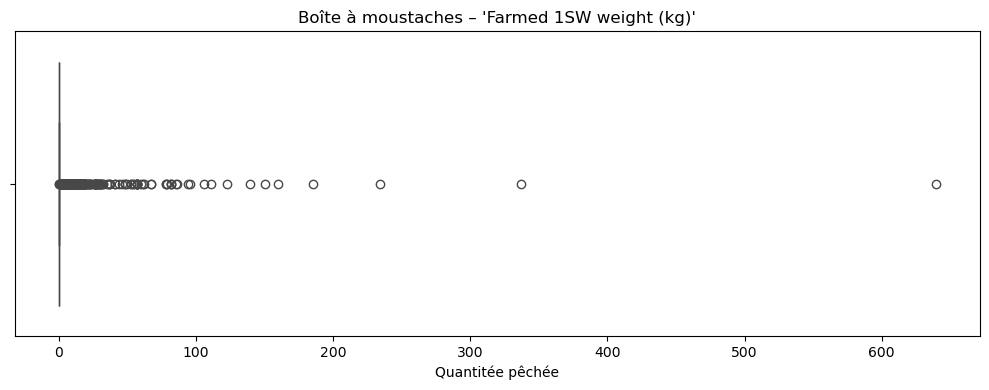

In [151]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=farm_wgt, color='mediumseagreen')
plt.title("Boîte à moustaches – 'Farmed 1SW weight (kg)'")
plt.xlabel("Quantitée pêchée")
plt.tight_layout()
plt.show()

La variable Farmed 1SW weight représente le poids de saumons d'un an pêchés. L'étude statistique nous montre une médiane de 0 ce qui indique qu'au moins la moitié des poids est nulle. Par ailleurs, on remarque une unique valeur vraiment extrême au-dessus de 600 kg alors que la grande majorité est concentrée entre 0 et 100kg.